In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import math
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank
from scipy.stats import rankdata
import statsmodels.api as sm
import statsmodels.formula.api as smf


CHR 5.5 [15pt]

In Chapter 4, we used logistic regression to predict the probability of default using income and balance on
the Default data set. We will now estimate the test error of this logistic regression model using the validation
set approach. Do not forget to set a random seed before beginning your analysis.

In [3]:
Default = pd.read_csv("Default.csv")

In [4]:
Default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [5]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [6]:
Default = Default.reset_index().drop('index', axis=1)

# Check for missing
assert Default.isna().sum().sum() == 0

# Rationalise types
Default = pd.get_dummies(Default, dtype=np.float64).drop(['default_No', 'student_No'], axis=1)

display(Default.head())

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0.0,0.0
1,817.180407,12106.134700,0.0,1.0
2,1073.549164,31767.138947,0.0,0.0
3,529.250605,35704.493935,0.0,0.0
4,785.655883,38463.495879,0.0,0.0


In [7]:
#(a) [3pt] Fit a logistic regression model that uses income and balance to predict default.

In [8]:
x01 = sm.add_constant(Default.iloc[:, 3:5]) 
y01 = np.where(Default['default']=='No', 0, 1) 

KeyError: 'default'

In [112]:
glm1 = sm.Logit(y01, x01)
print(glm1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.145834
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Mon, 12 Jul 2021   Pseudo R-squ.:                0.001357
Time:                        21:01:34   Log-Likelihood:                -1458.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                   0.04652
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0941      0.146    -21.156      0.000      -3.381      -2.807
income     -8.353e-06   4.21e

In [101]:
lg = LogisticRegression(random_state=0).fit(Default.drop(['default_Yes'],axis=1), Default['default_Yes'])

(b)

Using the validation set approach, estimate the test error of this model. In order to do this, you must perform
the following steps: i. Split the sample set into a training set and a validation set. ii. Fit a multiple logistic
regression model using only the training observations. iii. Obtain a prediction of default status for each
individual in the validation set by computing the posterior probability of default for that individual, and
classifying the individual to the default category if the posterior probability is greater than 0.5. iv. Compute
the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [113]:
x = pd.DataFrame(Default.iloc[:, 3:5])
y = np.array(Default['default'])
np.random.seed(1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [85]:
#i
x_train,x_validation,y_train, y_validation = train_test_split(Default[['balance','income','student_Yes']],Default['default_Yes'], test_size=0.30,random_state= 101)


In [86]:
#ii
lg1 = LogisticRegression(random_state=0).fit(x_train,y_train)

In [114]:
#new sol
glm2 = LogisticRegression()

In [17]:
#iii

In [115]:
#new sol
glm2.pred = glm2.fit(x_train, y_train).predict(x_test)

In [93]:
pred = lg1.predict_proba(x_validation)

In [88]:
for i in range(0,len(pred)):
    if pred[:,0][i] > 0.5:
        pred[:,0][i]=0
    else: 
         pred[:,0][i]=1
    
        

In [94]:
pred

array([[9.99095762e-01, 9.04238398e-04],
       [7.30055147e-01, 2.69944853e-01],
       [9.98300282e-01, 1.69971817e-03],
       ...,
       [8.85202448e-01, 1.14797552e-01],
       [9.99026351e-01, 9.73649008e-04],
       [9.55886014e-01, 4.41139860e-02]])

In [90]:
pred = pred[:,0][:]

In [91]:
y_validation = y_validatio n.apply(lambda x: 0 if x=='No' else 1)

In [26]:
#iv

In [116]:
error1 = 1-accuracy_score(y_test, glm2.pred) # 3.1%
print(error1)

0.030750000000000055


In [24]:
error = (y_validation!=pred).sum()

In [25]:
print("The fraction of the observations in the validation set that are misclassified is", round(error/len(y_validation),4))

The fraction of the observations in the validation set that are misclassified is 0.0233


(c)

Repeat the process in (b) three times, using three different splits of the observations into a training set and a
validation set. Comment on the results obtained.

### Solution

In [120]:
error2 = np.zeros(3)
for i in range(2, 5, 1):
    np.random.seed(i)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
    
    glm2        = LogisticRegression()
    glm2.pred   = glm2.fit(x_train, y_train).predict(x_test)
    error2[i-2] = 1-accuracy_score(y_test, glm2.pred)
    
error2
# Testing error is btw 3.1% and 3.4% (small variance).

array([0.03025, 0.03375, 0.033  ])

In [121]:
print("The mean error rate is", format(sum(error2)/len(error2)))

The mean error rate is 0.032333333333333325


The difference between the largest and the smallest test error
rate is 0.0035%

(d)

Now consider a logistic regression model that predicts the probability of default using income, balance, and
a dummy variable for student. Estimate the test error for this model using the validation set approach.
Comment on whether or not including a dummy variable for student leads to a reduction in the test error
rate.

### Solution

In [124]:
Default['student01'] = np.where(Default['student'] == 'No', 0, 1)
x = pd.DataFrame(Default.iloc[:, 3:6])
y = np.array(Default['default'])

np.random.seed(1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
    
glm3        = LogisticRegression()
glm3.pred   = glm3.fit(x_train, y_train).predict(x_test)
error3 = 1-accuracy_score(y_test, glm3.pred)
    
error3
# Testing error is similar to w/o student.

0.030750000000000055

In [44]:
Default['student'] = pd.get_dummies(Default['student'])

In [45]:
Default

,default,student,balance,income
0,No,1,729.526495,44361.625074
1,No,0,817.180407,12106.134700
2,No,1,1073.549164,31767.138947
3,No,1,529.250605,35704.493935
4,No,1,785.655883,38463.495879
...,...,...,...,...
9995,No,1,711.555020,52992.378914
9996,No,1,757.962918,19660.721768
9997,No,1,845.411989,58636.156984
9998,No,1,1569.009053,36669.112365


In [84]:
np.random.seed(6)
x_train,x_validation,y_train, y_validation = train_test_split(Default[['balance','income','student']],Default['default'], test_size=0.30)
lg = LogisticRegression(random_state=0).fit(x_train,y_train)
pred = lg.predict_proba(x_validation)
for i in range(0,len(pred)):
    if pred[:,0][i] > 0.5:
        pred[:,0][i]=0
    else: 
         pred[:,0][i]=1

pred = pred[:,0][:]

y_validation = y_validation.apply(lambda x: 0 if x=='No' else 1)
error = (y_validation!=pred).sum()/len(y_validation)
print("The misclassification error rate is {}".format(error)+ '%')

The misclassification error rate is 0.026%


It can be oberserved that the miscalssification error rate has not decreased after including the dummy of the student feature 

## CHR 5.6

We continue to consider the use of a logistic regression model to predict the probability of default using
income and balance on the Default data set. In particular, we will now compute estimates for the standard
errors of the income and balance logistic regression coefficients in two different ways: (1) using the bootstrap,
and (2) using the standard formula for computing the standard errors in the glm() function. Do not forget to
set a random seed before beginning your analysis

(a)

Using the summary() and glm() functions, determine the estimated standard errors for the coefficients
associated with income and balance in a multiple logistic regression model that uses both predictors.

### Solution

In [155]:
dfX = Default[['student', 'balance','income']]
dfX = pd.get_dummies(data = dfX, drop_first=True)
dfy = Default['default']

X = dfX[['balance', 'income']]
X = sm.add_constant(X)
y = pd.get_dummies(dfy, drop_first=True)

glmfit = sm.GLM(y, X, family=sm.families.Binomial()).fit()

glmfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Mon, 12 Jul 2021   Deviance:                       1579.0
Time:                        22:19:30   Pearson chi2:                 6.95e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================
"""

In [157]:
estimated_std_err = np.array(glmfit.params / glmfit.tvalues)
estimated_std_err



array([4.34772469e-01, 2.27381384e-04, 4.98524546e-06])

In [133]:
formula = 'default ~  balance + income'

In [134]:
model = smf.glm(formula = formula, data= Default, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                        Generalized Linear Model Regression Results                        
Dep. Variable:     ['default[No]', 'default[Yes]']   No. Observations:                10000
Model:                                         GLM   Df Residuals:                     9997
Model Family:                             Binomial   Df Model:                            2
Link Function:                               logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:                -789.48
Date:                             Mon, 12 Jul 2021   Deviance:                       1579.0
Time:                                     21:49:08   Pearson chi2:                 6.95e+03
No. Iterations:                                  9                                         
Covariance Type:                         nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-

In [135]:
print("Coefficeients")
print(result.params)
print()
print("p-Values")
print(result.pvalues)
print()
print("Dependent variables")
print(result.model.endog_names)

Coefficeients
Intercept    11.540468
balance      -0.005647
income       -0.000021
dtype: float64

p-Values
Intercept    3.036729e-155
balance      3.720516e-136
income        2.991499e-05
dtype: float64

Dependent variables
['default[No]', 'default[Yes]']


(b)

Write a function, boot.fn(), that takes as input the Default data set as well as an index of the observations,
and that outputs the coefficient estimates for income and balance in the multiple logistic regression model.

In [159]:
#new sol

def bootfn(data, index):
    X = data[['balance', 'income']]
    X = sm.add_constant(X)
    y = pd.get_dummies(data['default'], drop_first=True)
    X_train = X.iloc[index]
    y_train = y.iloc[index]
    glmfit = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
    estimated_std_err = np.array(glmfit.params / glmfit.tvalues)
    return estimated_std_err


bootfn(Default, list(range(1,10000)))

array([4.34775145e-01, 2.27384181e-04, 4.98521904e-06])

In [57]:
def boot_fn(df, idx):
    response   = 'default_Yes'
    predictors = ['income', 'balance']
    
    X = sm.add_constant(np.array(df[predictors].loc[idx]));
    y = np.array(df[response].loc[idx]) 
       
    # Logistic regression
    model_logit = smf.Logit(y, X).fit(disp=False);  
    return model_logit.params;

(c)

Use the boot() function together with your boot.fn() function to estimate the standard errors of the logistic
regression coefficients for income and balance.

### Solution

In [162]:
#new sol
from sklearn.utils import resample
std_err_df = pd.DataFrame()
idx = list(range(10000))

for i in range(1000):
    std_temp = bootfn(Default, resample(idx, replace=True))
    std_err_df = std_err_df.append([std_temp])

    std_err_df.reset_index(drop=True, inplace=True)
std_err_df.columns = ['intercept', 'balance', 'income']

std_err_df.head()

,intercept,balance,income
0,0.407990,0.000213,0.000005
1,0.431001,0.000227,0.000005
2,0.425318,0.000223,0.000005
3,0.451506,0.000229,0.000005
4,0.409148,0.000217,0.000005


In [163]:
std_err_df.shape

(1000, 3)

In [164]:
std_err_df.mean()

intercept    0.437219
balance      0.000229
income       0.000005
dtype: float64

(d)


As we can see, the bootstrap of the standard error estimates are close to standard errors of logistic regression coefficients.

### CHR 5.9

 We will now consider the Boston housing data set, from the MASS library.

In [166]:
data = pd.read_csv(r"C:\Users\Pratiksha\Documents\GitHub\ISLR\data\csv\Boston.csv")

In [167]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


(a)

Based on this data set, provide an estimate for the population mean of medv. Call this estimate ˆμ.

In [184]:
#print("The estimate ˆμ  is", data['medv'].mean())
mu_hat = np.mean(data.medv) 
print("The estimate ˆμ  is",mu_hat) # 22.53

The estimate ˆμ  is 22.532806324110698


(b)


Provide an estimate of the standard error of ˆμ. Interpret this result. Hint: We can compute the standard
error of the sample mean by dividing the sample standard deviation by the square root of the number of
observations.

### Solution

In [175]:
print("The estimate of the standard error of ˆμ  is", data['medv'].std()/math.sqrt(len(data)))

The estimate of the standard error of ˆμ  is 0.4088611474975351


(c)

Now estimate the standard error of ˆμ using the bootstrap. How does this compare to your answer from (b)?

### Solution

In [170]:
#bootstrap

def boot(var, n):
    m = np.zeros(n)
    for i in range(0, n):
        v    = var.sample(frac=1, replace=True)
        m[i] = np.mean(v)
    res1 = np.mean(m)
    res2 = np.std(m)
    print('mu: %.2f; se: %.2f' %(res1, res2))
    return(res1, res2)

result = boot(data.medv, 50) # close to (b)

mu: 22.59; se: 0.43


(d)

Based on your bootstrap estimate from (c), provide a 95 % confidence interval for the mean of medv. Compare
it to the results obtained using t.test(Boston$medv). Hint: You can approximate a 95 % confidence interval
using the formula [ˆμ − 2SE(ˆμ), ˆμ + 2SE(ˆμ)].

### Solution

In [177]:
print('lowerbd:%.2f' %(result[0] - 2*result[1]))
print('upperbd:%.2f' %(result[0] + 2*result[1])) 

lowerbd:21.74
upperbd:23.44


In [185]:
from scipy import stats
stats.t.interval(0.95,               # confidence level
                 df = len(data)-1, # degrees of freedom
                 loc = mu_hat,       # sample mean
                 scale= mu_hat_se)   # sample std dev

(21.730322160407493, 23.335290487813904)

Based on the bootstrap estimate from (c), a 95 % confidence interval for the mean of medv is [21.74,
23.44].
The 95 % confidence interval obtained using t.test(Boston$medv) is [21.73032, 23.3352].
Bootstrap estimate only 0.02 away for t.test estimate.

(e)

Based on this data set, provide an estimate, ˆμmed, for the median value of medv in the population

### Solution

In [8]:
print("the estimate, ˆμmed, for the median value of medv in the population is", data['medv'].median())

the estimate, ˆμmed, for the median value of medv in the population is 21.2


(f)

We now would like to estimate the standard error of ˆμmed.Unfortunately, there is no simple formula for
computing the standard error of the median. Instead, estimate the standard error of the median using the
bootstrap. Comment on your findings.



### Solution

In [198]:
def boot(var, n):
    m = np.zeros(n)
    for i in range(0, n):
        v     = var.sample(frac=1, replace=True)
        m[i]  = np.median(v)
    r = np.std(m) 

result = boot(data.medv, 1000)

print("The estimate of the standard error of the median using the bootstrap is 0.38359107132465914, The standard error to the median value is smaller than the mean value.")


The estimate of the standard error of the median using the bootstrap is 0.38359107132465914, The standard error to the median value is smaller than the mean value.


(G)


Based on this data set, provide an estimate for the tenth percentile of medv in Boston suburbs. Call this
quantity ˆμ0.1. (You can use the quantile() function.)

### Solution

In [10]:
print("An estimate for the tenth percentile of medv in Boston suburbs is", np.quantile(data['medv'], 0.1))

An estimate for the tenth percentile of medv in Boston suburbs is 12.75


(h)


Use the bootstrap to estimate the standard error of ˆμ0.1. Comment on your findings.

### Solution

In [207]:
def boot(var, n):
    m = np.zeros(n)
    for i in range(0, n):
        v     = var.sample(frac=1, replace=True)
        m[i]  = v.quantile(q=0.1)
    r = np.std(m) 
    return r

result = boot(data.medv, 50)

print("The standard error of ˆμ0.1 is estimated to be {} using the bootstrap.".format(result))

print("The standard error of ˆμ0.1 is larger than the standard error to the median value and the mean value.")

The standard error of ˆμ0.1 is estimated to be 0.533081607261027 using the bootstrap.
The standard error of ˆμ0.1 is larger than the standard error to the median value and the mean value.


Typed Porblem 1

Simulation-based inference vs parametric bootstrap vs nonparametric bootstrap.
A. Simulation-based inference setup: we know the exact/true data-generating mechanism. Instead of taking
integrals analytically which is typically impossible for nonlinear functions of the sample, we replace those
with Monte Carlo integrals (expressed as sample means).


B. Parametric bootstrap setup: we do not know the exact data-generating mechanism, but we make
distributional assumptions, then estimate distribution-specific parameters. Then we use this approximate
mechanism in place of the true mechanism (A) and make inference as in A.

C. Nonparametric bootstrap: discussed in class. We do not make distributional assumptions about our data.
Instead, we (implicitly) estimate the distribution of the data using the empirical (cumulative) distribution
function (ECDF), and generate samples using the ECDF (which is equivalent to resampling our original
sample with replacement.)
Setup: consider players A, B and C that will do inference as discussed in A, B and C above, respectively.
Specifically,
• Player A always knows the exact distribution from which the data came from, and can simulate samples
from it.
• Player B guesses the parametric family for the distribution of the data (let’s use Normal(mu,2) here),
estimates the parameters using the original sample (here, using the sample mean xbar and sample
variance s2), and then simulates new bootstrap samples from Normal(μ = x,2 = s2) distribution.
• Player C does not make parametric assumptions, and instead resamples the original dataset as discussed
in class.
Suppose the original sample comes from distribution G. We shall estimate the variance and sampling
distribution (via a histogram) of the sample variance estimator.

For each of the three cases below, complete the following steps:


(a) Simulate 1000 datasets (with n=100 for each dataset) from G. For the ith dataset, use set.seed(i). For
each dataset, compute the sample variance and save those in a vector. Then compute the sample mean
and variance of your vector of sample variances (report these). Also report the histogram based on
your vector of sample variances. This is our “golden standard”: the best estimates of “truth”/baseline.


(b) Estimate mean and variance using the sample mean xbar and sample variance s2 from the “observed”
dataset (specified below). Simulate 1000 datasets (with n=100 for each dataset) from Normal(μ =
¯x,2 = s2). For the ith dataset, use set.seed(i). For each dataset, compute the sample variance and
save those in a vector. Then compute the sample mean and variance of your vector of sample variances
(report these). Also report the histogram based on your vector of sample variances.


(c) Use resampling to generate 1000 datasets (with n = 100 for each dataset) from the observed sample
generated from G. For the ith dataset, use set.seed(i). For each dataset, compute the sample variance
and save those in a vector. Then compute the sample mean and variance of your vector of sample
variances (report these). Also report the histogram based on your vector of sample variances.
8


(d) Carefully discuss your findings; specifically, accuracy (bias and variance) and merits/drawbacks of
parametric vs nonparametric bootstrap.


(e) Optional: investigate the accuracy of parametric and nonparametric bootstrap as n increases (i.e., redo
Case 1 for n = 10, 25, 50, 100, 200, 400).

Case 1: G is normal with mean 0 and variance 1. (I.e., B’s guess about the family is correct)

Case 2: G is Student’s t with 4 degrees of freedom. (I.e., B’s guess about the family is very wrong.)

Case 3: G is Student’s t with 25 degrees of freedom.

In each case, use set.seed(0) to generate n = 100 observations from the specified distribution; this is your
observed sample/dataset that you will use to estimate μ and 2 in (b) and resample in (c)

Case 1

In [33]:
random.seed(0)
n=100
observed_data = np.random.normal(size=n)


In [16]:
sample_variance_a = []
for i in range(1,1000):
    random.seed(i)
    n=100
    data = np.random.normal(size=n)
    sample_variance_a.append(np.var(data))
    
np.mean(sample_variance_a)

0.9830529939477761

In [17]:
np.var(sample_variance_a)

0.018815669689019557

(b)

In [34]:
sample_variance_b = []
sample_mean = observed_data.mean()
sample_variance = observed_data.var()
for i in range(1, 1000):
    random.seed(i)
    n = 100
    data = np.random.normal(size = n, loc = sample_mean , scale = sample_variance)
    sample_variance_b.append(np.var(data))
    
np.mean(sample_variance_b)
    


0.9659974124205984

(c)

In [36]:
sample_variance_c = []
for i in range(1, 1000):
    random.seed(i)
    n=100
    data = np.random.choice(observed_data, n, replace=True)
    sample_variance_c.append(np.var(data))
    
np.mean(sample_variance_c)

0.9691584593569904

In [37]:
np.var(sample_variance_c)

0.016888452432730294

[Text(0.5, 0, 'sample_variance_c'), Text(0, 0.5, 'Frequency')]

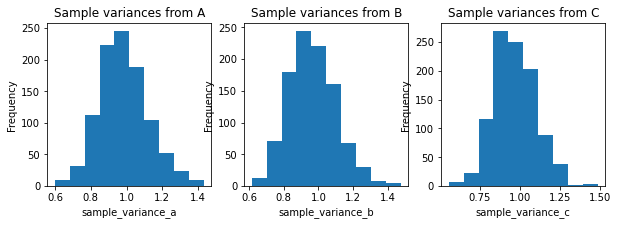

In [93]:
from matplotlib.pyplot import figure
f = plt.figure(figsize=(10,3))
ax1 = f.add_subplot(131)
ax1.hist(sample_variance_a)
ax1.set_title('Sample variances from A')
ax1.set(xlabel='sample_variance_a', ylabel='Frequency')

ax2 = f.add_subplot(132)
ax2.hist(sample_variance_b)
ax2.set_title('Sample variances from B')
ax2.set(xlabel='sample_variance_b', ylabel='Frequency')

ax3 = f.add_subplot(133)
ax3.hist(sample_variance_c)
ax3.set_title('Sample variances from C')
ax3.set(xlabel='sample_variance_c', ylabel='Frequency')

In case 1, the method A has the smallest bias but the largest variance.
The method B is similar to method C, but have a slightly smaller bias and a slightly bigger variance.
The method C has the largest bias but the smallest variance.

case 2 [7 pt]

In [109]:
np.random.seed(0)
n=100
observed_data = np.random.standard_t(df = 4, size = n)

(a) 

In [110]:
sample_variance_a = []
for i in range(1,1000):
    random.seed(i)
    n=100
    data = np.random.standard_t(df = 4, size=n)
    sample_variance_a.append(np.var(data))
    
np.mean(sample_variance_a)

2.000319599905891

In [111]:
np.var(sample_variance_a)

1.0670192794695725

(b) 

In [112]:
sample_variance_b = []
sample_mean = observed_data.mean()
sample_variance = observed_data.var()
for i in range(1, 1000):
    random.seed(i)
    n = 100
    data = np.random.normal(size = n, loc = sample_mean , scale = np.sqrt(sample_variance))
    sample_variance_b.append(np.var(data))
    
np.mean(sample_variance_b)
    

1.429617262389443

In [113]:
np.var(sample_variance_b)

0.037063627933984204

(c) 

In [114]:
sample_variance_c = []
for i in range(1, 1000):
    random.seed(i)
    n=100
    data = np.random.choice(observed_data, n, replace=True)
    sample_variance_c.append(np.var(data))
    
np.mean(sample_variance_c)

1.4365747668114353

In [115]:
np.var(sample_variance_c)

0.04986385598918044

[Text(0.5, 0, 'sample_variance_c'), Text(0, 0.5, 'Frequency')]

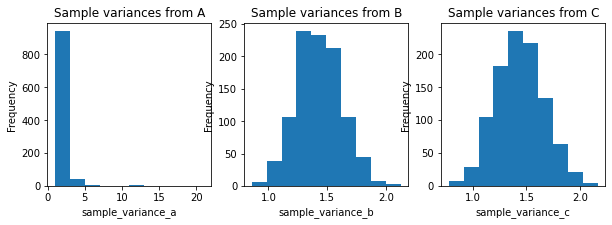

In [116]:
from matplotlib.pyplot import figure
f = plt.figure(figsize=(10,3))
ax1 = f.add_subplot(131)
ax1.hist(sample_variance_a)
ax1.set_title('Sample variances from A')
ax1.set(xlabel='sample_variance_a', ylabel='Frequency')

ax2 = f.add_subplot(132)
ax2.hist(sample_variance_b)
ax2.set_title('Sample variances from B')
ax2.set(xlabel='sample_variance_b', ylabel='Frequency')

ax3 = f.add_subplot(133)
ax3.hist(sample_variance_c)
ax3.set_title('Sample variances from C')
ax3.set(xlabel='sample_variance_c', ylabel='Frequency')

In case 2, the ture variance should be 2.
The method A has the smallest bias but the largest variance.
The method B has the largest bias but the smallest variance.
The method C’s bias is similar to method

case3 [7 pt]

### Solution

In [119]:
np.random.seed(0)
n=100
observed_data = np.random.standard_t(df = 25, size = n)

(a)

In [120]:
sample_variance_a = []
for i in range(1,1000):
    random.seed(i)
    n=100
    data = np.random.standard_t(df = 25, size=n)
    sample_variance_a.append(np.var(data))
    
np.mean(sample_variance_a)

1.0687504492351292

In [121]:
np.var(sample_variance_a)

0.026199340492898397

(b)

In [122]:
sample_variance_b = []
sample_mean = observed_data.mean()
sample_variance = observed_data.var()
for i in range(1, 1000):
    random.seed(i)
    n = 100
    data = np.random.normal(size = n, loc = sample_mean , scale = np.sqrt(sample_variance))
    sample_variance_b.append(np.var(data))
    
    
np.mean(sample_variance_b)
    

0.9437628065823308

In [123]:
np.var(sample_variance_b)

0.017283356114991703

(c) 

In [124]:
sample_variance_c = []
for i in range(1, 1000):
    random.seed(i)
    n=100
    data = np.random.choice(observed_data, n, replace=True)
    sample_variance_c.append(np.var(data))
    
np.mean(sample_variance_c)

0.949197539966606

In [125]:
np.var(sample_variance_c)

0.015289563517379843

[Text(0.5, 0, 'sample_variance_c'), Text(0, 0.5, 'Frequency')]

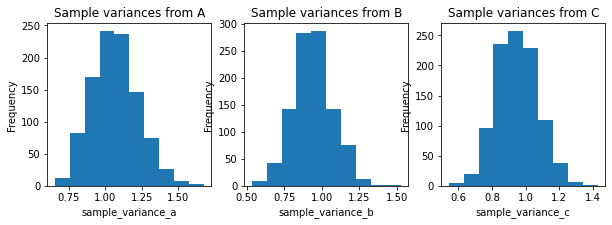

In [126]:
from matplotlib.pyplot import figure
f = plt.figure(figsize=(10,3))
ax1 = f.add_subplot(131)
ax1.hist(sample_variance_a)
ax1.set_title('Sample variances from A')
ax1.set(xlabel='sample_variance_a', ylabel='Frequency')

ax2 = f.add_subplot(132)
ax2.hist(sample_variance_b)
ax2.set_title('Sample variances from B')
ax2.set(xlabel='sample_variance_b', ylabel='Frequency')

ax3 = f.add_subplot(133)
ax3.hist(sample_variance_c)
ax3.set_title('Sample variances from C')
ax3.set(xlabel='sample_variance_c', ylabel='Frequency')

In case 3, the ture variance should be 25/23=1.087.
The method A has the smallest bias but the largest variance.
The method C has the largest bias but the smallest variance.
The method B’s bias and variance are similar to method C, just slightly larger. 

(e) 

In [7]:
mean_b = []
var_b = []
mean_c = []
var_c = []

for n in ([10,25,50,100,200,400]):
    np.random.seed(0)
    observed_data = np.random.normal(size=n)
    
    #b
    sample_variance =[]
    sample0_mean = np.mean(observed_data)
    sample0_variance = np.var(observed_data)
    for i in range(1,1001):
        np.random.seed(i)
        data =  np.random.normal(size = n, loc = sample0_mean , scale = np.sqrt(sample0_variance))
        sample_variance.append(np.var(data))
    mean_b.append(np.mean(sample_variance))
    var_b.append(np.var(sample_variance))
    
    #c
    sample_variance = []
    for i in range(1,1001):
        np.random.seed(i)
        data =  np.random.choice(observed_data, n, replace=True)
        sample_variance.append(np.var(data))
        
    mean_c.append(np.mean(sample_variance))
    var_c.append(np.var(sample_variance))

mean_b
        
        

[0.8470130338740675,
 1.1107935314197772,
 1.2378774559474612,
 1.009061838763145,
 1.0378418699919216,
 0.9718299624889708]

In [6]:
mean_c

[0.8378122457652746,
 1.1331659387458708,
 1.2403658414008154,
 1.0064896574672693,
 1.0395759070209443,
 0.9736360640468957]

In [7]:
var_b

[0.1594513430833136,
 0.0973087483414672,
 0.061942207587914355,
 0.019239902318001996,
 0.010996167603519392,
 0.005062960824265625]

In [8]:
var_c

[0.08376745213852572,
 0.1421492995398495,
 0.04936471201272329,
 0.01653962612102736,
 0.007291219916455466,
 0.0038595850561258154]

<ipython-input-16-3e882c4ebc98>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = f.add_subplot(121)


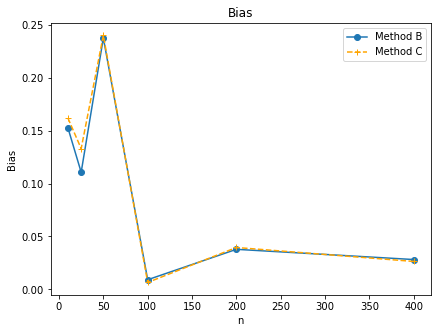

In [16]:
from matplotlib.pyplot import figure
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(121)
x = np.array([10,25,50,100,200,400])
y1 = [abs(x-1) for x in mean_b]
y2 = [abs(x-1) for x in mean_c]
ax1.plot(x,y1,marker = 'o')
ax1.set_title("Bias")
ax1.set(xlabel='n', ylabel='Bias')
ax2 = f.add_subplot(121)
ax2.plot(x,y2, linestyle = 'dashed',color='orange',marker='+')
ax1.legend(loc = 'upper right', labels=["Method B", "Method C"])








<ipython-input-17-492deb2a3677>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax4 = f.add_subplot(122)


[Text(0.5, 0, 'n'), Text(0, 0.5, 'Variance')]

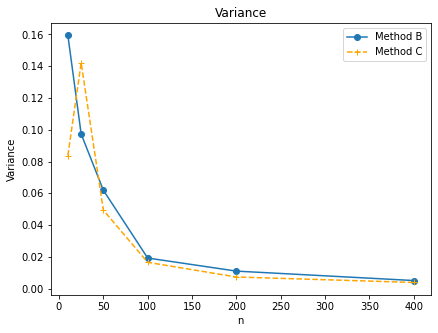

In [17]:
f = plt.figure(figsize=(15,5))
ax3 = f.add_subplot(122)
ax3.plot(x,var_b,marker = 'o')

ax4 = f.add_subplot(122)
ax4.plot(x,var_c, linestyle = 'dashed',color='orange',marker='+')
ax4.legend(loc = 'upper right', labels=["Method B", "Method C"])
ax3.set_title("Variance")
ax3.set(xlabel='n', ylabel='Variance')

We can see that as the sample size becomes larger, the variance of the method B(parametric bootstrap) and
method C (nonparametric bootstrap) all become smaller. The bias of the two methods mostly tends to
become small as the sample size becomes large. However, the bias of the two methods will have a increasing
when the sample size grows from 25 to 100.
In case 1, the nonparametric bootstrap tends to have smaller variance than the parametric bootstrap no
matter how large the sample size is.
For the bias, the parametric bootstrap mostly tends to have smaller bias than the nonparametric bootstrap.
However, when the sample size is really small, for example, n=10, the nonparametric bootstrap tends to have
smaller bias than the parametric bootstrap.

Typed problem 2 

Exploring the wrong way to do cross validation (ch.05 slides, p.26).


Investigate the effect of the high dimensionality of features (p) on the out-of-sample misclassification rate
when variable prescreening is allowed to “see” the entire data.

Let n = 25 be the number of observations per group in a two group classification problem (e.g., cases and
controls; i.e., first n Y’s are ones, and the next 25 Y’s are zeros). For p=200*2ˆi (i=0,1,. . . ,5), simulate
features as iid Normal(0,1), i.e., there is no group effect. For each feature, perform a two-sample t-test of the
equality of the means; keep at most p* features that have the lowest p-values under 0.05 (use p* = 5, 10, 20
and 40). I.e., if t tests reject the null hypothesis (that the means are the equal) at the level of significance
0.05, use p* =< t features with the lowest p-values. (Some of the entries in the table of results below may be
blank; this happens when p* > t.)

Report in a table the average ten-fold CV misclassification rate; the columns should correspond to the values
16
of p* and rows - to the values of i (equivalently, p). Briefly discuss your findings.
A couple of suggestion:


1. To implement K-fold cross-validation by hand (required for this problem set), peruse the example from
the ISLR lab on p.250 in order to define folds.


2. When simulating the data, in order to reduce the amount of variability in the results due to different
random seeds and to ensure that the predictors for smaller p are nested within those for larger p,
generate all predictors at once as
set.seed(0); nr = 50; nc = 200*2^5; # nc = 6400
M = matrix(rnorm(nr*nc),nrow=50);
and use X = M[,1:p] as the design matrix for the problem with p covariates.

A remark: here, the choice of p* serves as a means to variable selection after prescreening. Variable selection
is a subject of Ch.06. We will likely revisit this problem after Ch.06 has been covered. E.g., for each p, retain
p* candidate predictors, and use those as input for more formal variable selection using tools from Ch.06.

In [18]:
np.random.seed(0)
nr = 50
nc = 6400
M=  np.random.normal(size = nr*nc)
M = np.reshape(M, (50,6400))
k=[1,2,3,4,5,6,7,8,9,10]
folds = np.random.choice(k, nr, replace=True)
Y = np.repeat([0,1],repeats=25)

In [19]:
ivector =[0,1,2,3,4,5]
pstarvector = [5,10,20,40]
CV_error_matrix = np.empty((6,4))
CV_error_matrix[:] = np.nan 
CV_error_matrix

array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan]])

In [20]:
for i_idx in range(0, len(ivector)):
    for pstar_idx in range(0, len(pstarvector)):
        i = ivector[i_idx]
        pstar = pstarvector[pstar_idx]
        
        p = (200)*(2**i)
        X = M[:,0:p]
        x1 = X[0:24]
        x2 = X[25:49]
        
        pvalues =(stats.ttest_ind(x1,x2))
        asubset = (pvalues[1]<0.05) & (rankdata(pvalues[1])<=pstar)
        XYdf = pd.DataFrame(X[:,asubset])
        Y1 = pd.DataFrame(Y, columns = ['Y'])
        XYdf = pd.concat([XYdf,Y1],axis=1)
        Err = 0
        for leave in range(2,10):
            XYdftrain = XYdf[folds!=leave]
            col = ['x'+ str(i) for i in range(len(XYdftrain.columns)-1)]
            col.append('Y')
            XYdftrain.columns =col
            all_columns = "+".join(XYdftrain.columns[0:len(XYdftrain.columns)-1])
            my_formula = "Y~" + all_columns
            logitmodel = smf.glm(formula = my_formula , data= XYdftrain, family=sm.families.Binomial())
            XYdftest = XYdf[folds==leave]
            
            

In [21]:
XYdftest

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Y
3,0.197215,-1.109317,-0.135954,-0.852593,0.097838,0.656100,-0.206410,1.672096,1.032021,-0.325966,...,-0.828679,0.894533,-0.789235,-0.046078,1.573373,1.270726,0.099393,0.752641,-0.108359,0
9,-1.088471,0.904926,-0.992570,-0.888576,2.040166,1.601433,1.677672,-0.171091,1.388496,-0.191526,...,0.168297,1.946411,1.937735,-0.024976,-0.286401,-0.848337,-0.800029,0.292244,1.353391,0
34,-0.757316,0.058134,0.628784,-0.697509,-1.076522,0.058884,-0.377997,-0.011975,-0.377550,-0.157268,...,-0.348823,1.639842,-1.474451,0.201433,0.050951,-0.140865,0.191090,1.541627,1.972755,1
41,0.732568,-1.101042,-1.416241,-1.173799,-0.533539,-2.082140,-0.838467,-1.018172,0.817747,1.840743,...,0.055676,-0.327185,-0.461940,-0.300436,-0.465776,-1.237725,-1.369259,1.577525,1.224234,1
